# Cliff Walking - Aprendizagem por reforço
#### Dupla: Mateus Padilha e Breno de Souza

Referências:

(https://gymnasium.farama.org/environments/toy_text/cliff_walking/)

(Sutton, R; Barto, A. Reinforcement Learning: An Introduction. The MIT Press, 2018.)

In [ ]:
!pip install gymnasium
!pip install numpy
!pip install imageio imageio_ffmpeg

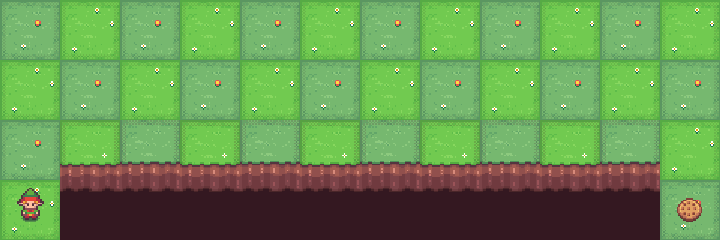

# Descrição
- Estado inicial:
  - O episódio começa com o jogador na posição [36], localização [3, 0] da grade  4x12.

- Recompensa:
  - A cada passo o agente é compensando com -1, a menos que caia no penhasco, ao longo de [3, 1..10]. Se o agente se mover para um local de penhasco, ele retornará ao estado inicial.

- Estado final:
  - O episódio final, de objetivo, termina com o jogador na posição [47], localizado em [3, 11].

O agente exerce um conjunto de ações até atingir o objetivo.

# Ações possíveis
* 0: Subir

* 1: Mover para a direita

* 2: Mover para baixo

* 3: Mover para a esquerda

In [ ]:
import gymnasium as gym
import random
import imageio
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt
from argparse import Namespace
from tqdm.notebook import tqdm
import seaborn as sns

env = gym.make('CliffWalking-v1', render_mode="rgb_array") # importando o CliffWalking
env = env.unwrapped
env.reset()
images = []
actions_ = {
    0: "Subir",
    1: "Direita",
    2: "Descer",
    3: "Esquerda"
}
for i in range(10):
  random_action = env.action_space.sample() # Ações aleatórias
  new_state, reward, terminated, truncated, info = env.step(random_action)
  images.append(env.render()) # renderizando estado atual, para criar um gif.
  print(f'Açao escolhida: {actions_[random_action]} | posição: {new_state} | recompensa: {reward}') # exibindo as ações em texto.
imageio.mimsave('/content/replay.gif', images, fps=1)



Açao escolhida: Esquerda | posição: 36 | recompensa: -1
Açao escolhida: Descer | posição: 36 | recompensa: -1
Açao escolhida: Esquerda | posição: 36 | recompensa: -1
Açao escolhida: Direita | posição: 36 | recompensa: -100
Açao escolhida: Descer | posição: 36 | recompensa: -1
Açao escolhida: Esquerda | posição: 36 | recompensa: -1
Açao escolhida: Esquerda | posição: 36 | recompensa: -1
Açao escolhida: Subir | posição: 24 | recompensa: -1
Açao escolhida: Direita | posição: 25 | recompensa: -1
Açao escolhida: Esquerda | posição: 24 | recompensa: -1


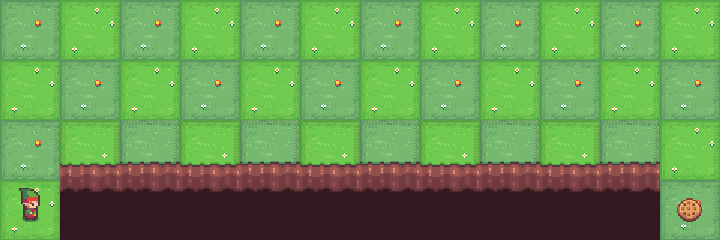

In [ ]:
Image('./replay.gif')

In [ ]:
# Parâmetros
gamma = 0.9  # Fator de desconto
theta = 1e-6 # Limite para convergência

# Inicializar a função valor V(s) para todos os estados
n_estados = env.observation_space.n
V = np.zeros(n_estados)

# Value Iteration
delta = float('inf')
max_iterations = 200 # Definimos um número máximo de iterações para evitar loops infinitos

iteration = 0
while delta > theta and iteration < max_iterations:
    delta = 0
    for s in range(n_estados):
        if s == 47: # O estado objetivo tem valor 0
            continue

        v = V[s]
        # Calcular Q(s,a) para cada ação a
        q_vals = []
        for a in range(env.action_space.n):
            q = 0
            for prob, next_state, reward, terminated in env.P[s][a]:
                q += prob * (reward + gamma * V[next_state])
            q_vals.append(q)

        # Atualizar V(s) com o valor máximo de Q(s,a) sobre todas as ações
        V[s] = max(q_vals)
        delta = max(delta, abs(v - V[s]))
    iteration += 1

print(f"Value Iteration convergiu após {iteration} iterações.")
print("Função Valor (V):")
print(V.reshape(4, 12)) # Exibir V como uma grade 4x12

Value Iteration convergiu após 15 iterações.
Função Valor (V):
[[-7.71232075 -7.45813417 -7.17570464 -6.86189404 -6.5132156  -6.12579511
  -5.6953279  -5.217031   -4.68559    -4.0951     -3.439      -2.71      ]
 [-7.45813417 -7.17570464 -6.86189404 -6.5132156  -6.12579511 -5.6953279
  -5.217031   -4.68559    -4.0951     -3.439      -2.71       -1.9       ]
 [-7.17570464 -6.86189404 -6.5132156  -6.12579511 -5.6953279  -5.217031
  -4.68559    -4.0951     -3.439      -2.71       -1.9        -1.        ]
 [-7.45813417 -7.17570464 -6.86189404 -6.5132156  -6.12579511 -5.6953279
  -5.217031   -4.68559    -4.0951     -3.439      -1.          0.        ]]


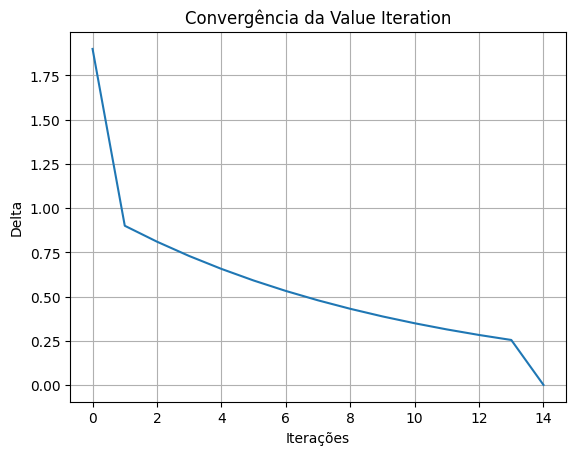

In [ ]:
deltas = []
V = np.zeros(n_estados)
iteration = 0
delta = float('inf')

while delta > theta and iteration < max_iterations:
    delta = 0
    for s in range(n_estados):
        if s == 47:
            continue
        v = V[s]
        q_vals = []
        for a in range(env.action_space.n):
            q = 0
            for prob, next_state, reward, terminated in env.P[s][a]:
                q += prob * (reward + gamma * V[next_state])
            q_vals.append(q)
        V[s] = max(q_vals)
        delta = max(delta, abs(v - V[s]))
    deltas.append(delta)
    iteration += 1

plt.plot(deltas)
plt.xlabel('Iterações')
plt.ylabel('Delta')
plt.title('Convergência da Value Iteration')
plt.grid(True)
plt.show()

O laço for i in range(max_iters) rodou 15 vezes (de 0 a 14);

**Análise da Convergência da Value Iteration:**

O gráfico "Convergência da Value Iteration" mostra como o valor máximo de mudança (delta) na função valor V diminui a cada iteração. A Value Iteration é um algoritmo iterativo que refina a estimativa da função valor até que ela convirja. A convergência ocorre quando a mudança nos valores de V entre as iterações cai abaixo do limiar (theta).

Neste gráfico, observamos que:
- O delta começa relativamente alto, indicando grandes mudanças nos valores de V nas primeiras iterações. Isso é esperado, pois o algoritmo está aprendendo a função valor a partir de um estado inicial.
- O delta diminui rapidamente nas iterações subsequentes. Isso demonstra que os valores de V estão se estabilizando à medida que o algoritmo explora o espaço de estados e ações e atualiza as estimativas.
- O delta cruza o limiar de convergência (theta = 1e-6) após 15 iterações, conforme indicado na saída do código da Value Iteration. Isso confirma que o algoritmo encontrou a função valor ótima para o ambiente, dentro da precisão definida.

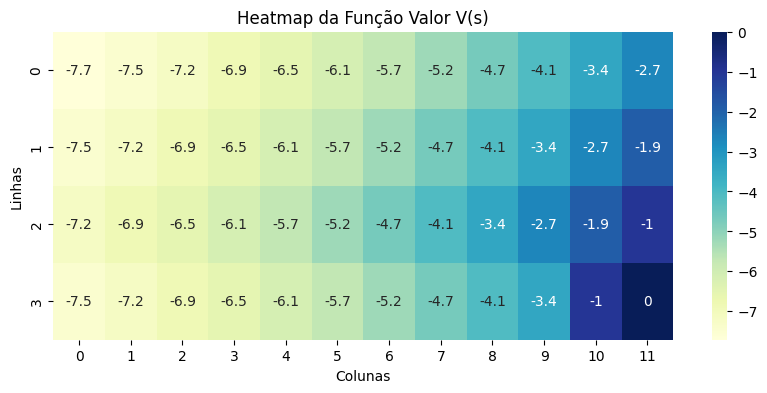

In [ ]:
plt.figure(figsize=(10, 4))
sns.heatmap(V.reshape(4, 12), annot=True, cmap="YlGnBu", cbar=True)
plt.title("Heatmap da Função Valor V(s)")
plt.xlabel("Colunas")
plt.ylabel("Linhas")
plt.show()


**Análise do Heatmap da Função Valor V(s):**

O heatmap exibe a função valor V(s) para cada estado. Cada célula corresponde a um estado, e a cor e o número na célula indicam o valor estimado de V(s) para esse estado. Valores mais altos (cores mais claras/números menos negativos) representam estados mais desejáveis, ou seja, estados dos quais o agente pode esperar receber uma recompensa acumulada maior.

Observando o heatmap:
- O estado de objetivo ([3, 11], posição 47) tem um valor de 0, que é o valor mais alto (menos negativo), como esperado, pois atingir este estado termina o episódio com uma recompensa de 0 (assumindo que todas as recompensas anteriores foram -1).
- Os estados próximos ao estado de objetivo na linha de cima do penhasco tendem a ter valores mais altos (menos negativos), indicando que eles são mais próximos do objetivo e, portanto, mais desejáveis.
- Os estados na "zona do penhasco" (fila 3, colunas 1 a 10) têm valores mais baixos (mais negativos), refletindo a penalidade de cair no penhasco e retorno ao estado inicial, que tem um valor baixo.

O heatmap fornece uma representação visual de "desejabilidade" de cada estado, refletindo a recompensa esperada a longo prazo ao se partir desse estado. Ele é uma ferramenta útil para entender como a Value Iteration avaliou os diferentes estados do ambiente.

In [ ]:
# Calcular a Função Q(s,a)
n_acoes = env.action_space.n
Q = np.zeros((n_estados, n_acoes))

for s in range(n_estados):
    for a in range(n_acoes):
        q = 0
        for prob, next_state, reward, terminated in env.P[s][a]:
            q += prob * (reward + gamma * V[next_state])
        Q[s, a] = q

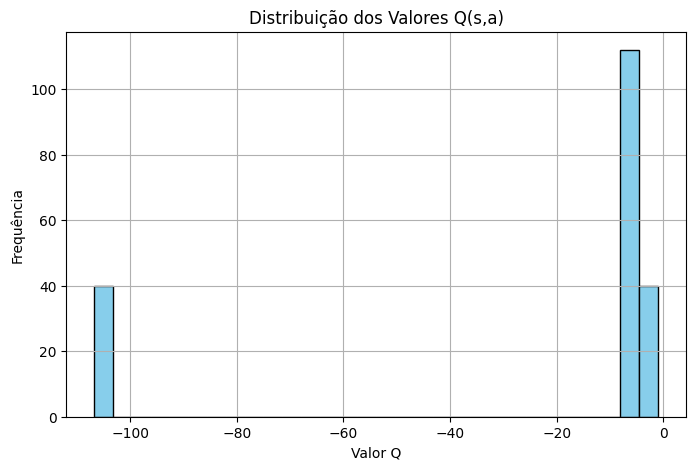

In [ ]:
plt.figure(figsize=(8, 5))
plt.hist(Q.flatten(), bins=30, color='skyblue', edgecolor='black')
plt.title("Distribuição dos Valores Q(s,a)")
plt.xlabel("Valor Q")
plt.ylabel("Frequência")
plt.grid(True)
plt.show()


**Análise da Distribuição dos Valores Q(s,a):**

No histograma temos a frequência com que diferentes valores Q (valores de ação-estado) ocorrem no ambiente Cliff Walking após a Value Iteration. Os valores Q(s,a) representam a recompensa esperada acumulada ao partir do estado 's', tomar a ação 'a'.

Observando o histograma:
- A distribuição dos valores Q tem a maioria dos valores concentrados em torno de um pico negativo. Isso é esperado, pois a recompensa por passo no ambiente Cliff Walking é negativa.

A distribuição dos valores Q fornece insights sobre a gama de valores de recompensa esperada para diferentes ações em diferentes estados. Uma distribuição mais ampla poderia indicar um ambiente com uma maior variabilidade nas recompensas esperadas para diferentes decisões. Neste caso, a distribuição tem dois polos de concentração, o que é consistente com a estrutura de recompensa do ambiente Cliff Walking.